<a href="https://colab.research.google.com/github/JacksonPlatiny/Estudo-Dirigido-Controle-e-Automacao/blob/main/Cap%C3%ADtulo%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo dirigido de Controle e Automação I
### Livro: Sistemas de Controle Modernos, de Richard C. Dorf & Robert H. Bishop.
### Alunos: Jackson Platiny Soares Leite & Gabriel Lopes Rodrigues e Silva.

# Capítulo 7 - O Método do Lugar das Raízes:

## 7.1 Introdução

O **Método do Lugar das Raízes** é uma técnica gráfica usada para analisar a estabilidade e a resposta dinâmica de sistemas de controle, mostrando como as raízes da equação característica de um sistema variam conforme o parâmetro de controle (geralmente o ganho \(K\)) é alterado. Esse método é essencial para o projeto e análise de sistemas de controle.

## 7.2 O Conceito de Lugar das Raízes

O **lugar das raízes** é o trajeto que as raízes da equação característica de um sistema seguem no plano \( s \) à medida que o ganho do sistema (\(K\)) varia. A equação característica é dada por:

$$
1 + K G(s) = 0
$$

Onde \( G(s) \) é a função de transferência do sistema. As raízes dessa equação determinam os polos do sistema, e sua posição no plano \( s \) está diretamente ligada à resposta dinâmica do sistema.

In [ ]:
!pip install control
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

## 7.3 O Procedimento do Lugar das Raízes

### Passos para o Procedimento:
1. **Identificação dos pólos e zeros**: Determine os pólos e zeros do sistema.
2. **Construção do Lugar das Raízes**:
   - Traçar as linhas de loci a partir dos pólos e zeros.
   - Determinar os ângulos de entrada e saída dos loci.
   - Verificar as interseções com o eixo real e outras características importantes.
3. **Ajuste do Ganho**: O valor do ganho \(K\) é ajustado para ver a movimentação das raízes.

### Fórmulas Importantes:
- Requisitos de **magnitude** e **ângulo** para a posição das raízes:
  $$
  |G(s)| = 1 \quad \text{e} \quad \angle G(s) = 180^\circ + k360^\circ
  $$

O código asseguir implementa o Método do Lugar das Raízes para um sistema de controle de malha única com retroação.

$$
1 + GH(s) = 1 + \frac{K \left( \frac{1}{2}s + 1 \right)}{s \left( \frac{1}{4}s + 1 \right)} = 0
$$

O numerador e o denominador da função de transferência são extraídos:

- **Numerador**:  
  $$
  (1/2)s + 1
  $$

- **Denominador**:  
  $$
  s \left( \frac{1}{4}s + 1 \right) = \frac{1}{41}{0.25s^2 + s}
$$


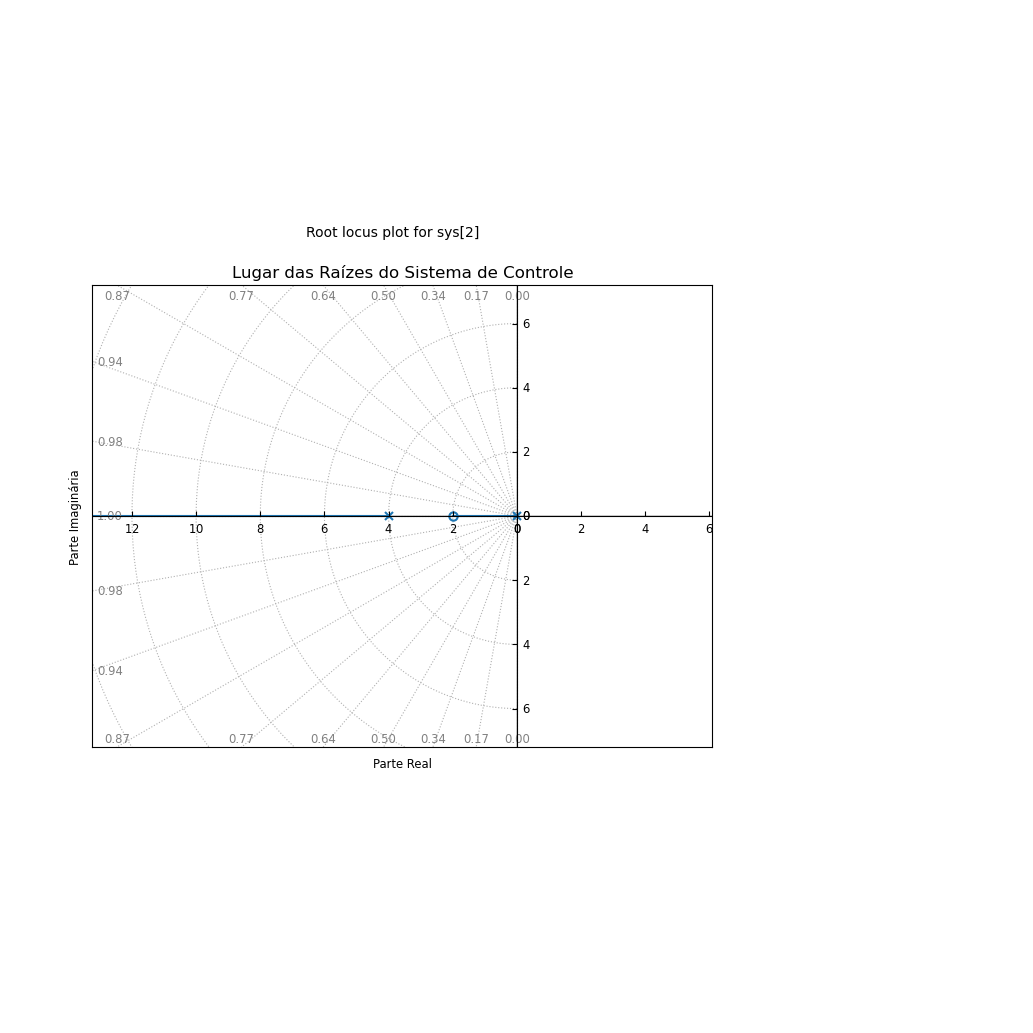

In [ ]:
# Definição do numerador e denominador da função de transferência G(s)H(s)
num = [0.5, 1]  # (1/2)s + 1
den = [0.25, 1, 0]  # s(1/4s + 1) = (1/4)s² + s

# Criando a função de transferência GH(s)
GH = ctrl.TransferFunction(num, den)

# Plotando o Lugar das Raízes
plt.figure(figsize=(8,6))
ctrl.rlocus(GH, grid=True)
plt.title("Lugar das Raízes do Sistema de Controle")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginária")
plt.show()

O gráfico do Lugar das Raízes mostra como os pólos do sistema fechado se deslocam no plano \( s \) à medida que o ganho \( K \) varia. O comportamento das raízes nos diz se o sistema será:

- **Estável**: Se todas as raízes estiverem no semiplano esquerdo (parte real negativa).
- **Marginalmente estável**: Se houver raízes no eixo imaginário.
- **Instável**: Se houver raízes no semiplano direito (parte real positia).


## 7.4 Um Exemplo de Análise e Projeto de Sistemas de Controle Utilizando o Método do Lugar das Raízes

### Sistema de Controle de Segunda Ordem:
Considere um sistema de segunda ordem representado pela equação característica:

$$
1 + K \frac{1}{s(s+2)} = 0
$$

O **lugar das raízes** para esse sistema mostra como as raízes se movem no plano \( s \) à medida que \( K \) varia. A localização das raízes afeta diretamente a resposta transitória e a estabilidade do sistema.


### **1. Exemplo**
A análise e o projeto de um sistema de controle podem ser realizados utilizando-se a **Transformada de Laplace**, **diagramas de fluxo de sinal**, o **plano \(s\)** e o **método do lugar das raízes**. Neste exemplo, analisaremos um sistema de **balança com escala automática** e selecionaremos um ganho \( K \) adequado baseado no método do **lugar das raízes**.

### **2. Definição do Sistema**
O sistema é modelado a partir das seguintes especificações:

- **Momento de inércia da viga**: \( J = 0.05 \) kg·m²
- **Tensão da bateria**: \( E = 24V \)
- **Parafuso sem fim**: 20 voltas/cm
- **Potenciômetro de posição**: 6 cm de comprimento
- **Potenciômetro de entrada \( y \)**: 0.5 cm de comprimento
- **Constante de amortecimento**: \( b = 10\sqrt{3} \) kgf/m/s
- **Comprimento da barra**: 20 cm
- **Ponto de aplicação do peso**: 5 cm do pivô

### **3. Modelo Matemático**  

A função de transferência do sistema em malha aberta é dada por:  

$$
G(s)H(s) = \frac{K}{J s^2 + b s}
$$  

Com os valores dados, substituímos \( J = 0.05 \) e \( b = 10\sqrt{3} \):  

$$
G(s)H(s) = \frac{K}{0.05 s^2 + 10\sqrt{3} s}
$$  


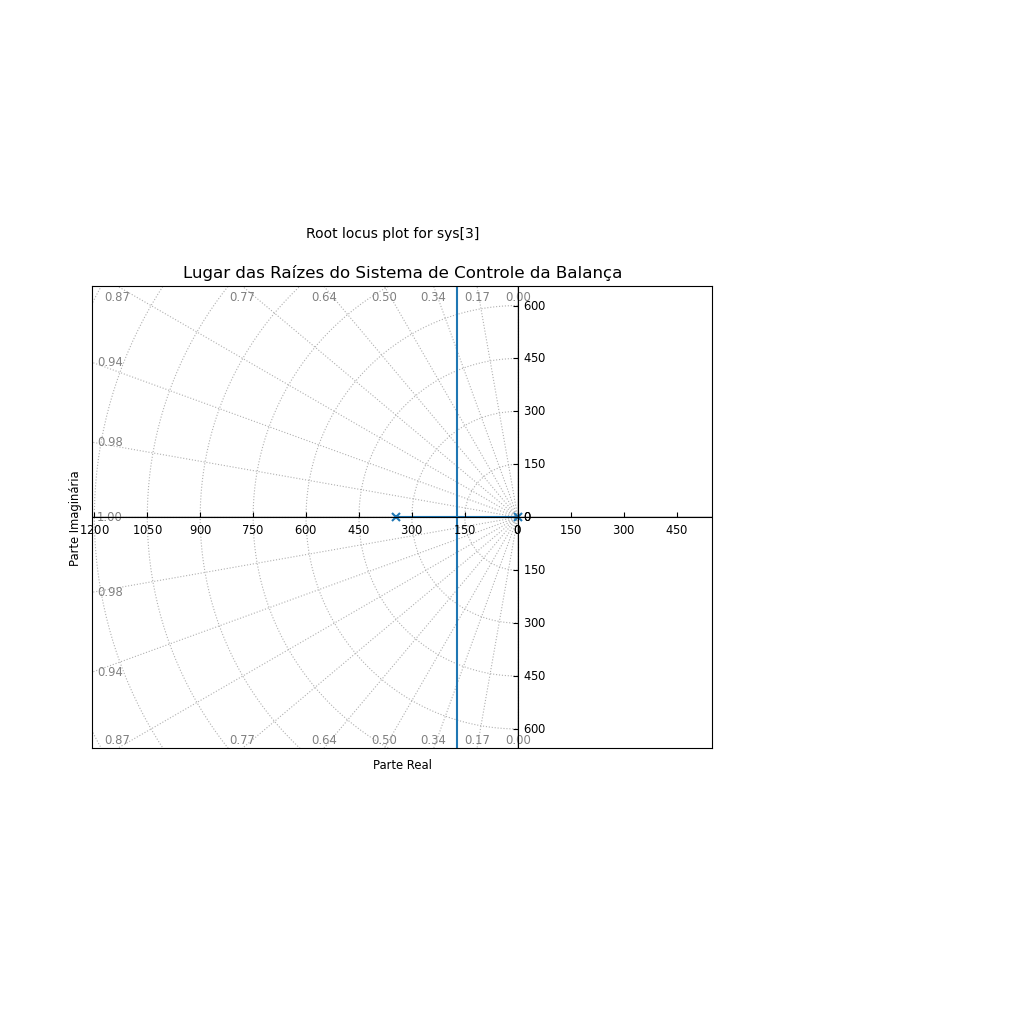

In [ ]:
# Definição dos parâmetros do sistema
J = 0.05  # Momento de inércia da viga (kg·m²)
b = 10 * np.sqrt(3)  # Constante de amortecimento (kgf/m/s)
K = 1  # Ganho arbitrário para análise inicial

# Numerador e denominador da função de transferência
num = [K]  # Apenas K
den = [J, b, 0]  # 0.05s² + 10√3 s

# Criando a função de transferência G(s)H(s)
GH = ctrl.TransferFunction(num, den)

# Plotando o Lugar das Raízes
plt.figure(figsize=(8,6))
ctrl.rlocus(GH, grid=True)
plt.title("Lugar das Raízes do Sistema de Controle da Balança")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginária")
plt.show()

## 7.5 Projeto de Parâmetro pelo Método do Lugar das Raízes

Para projetar o parâmetro \(K\) utilizando o método do lugar das raízes, deve-se garantir que as raízes do sistema (ou polos) se movam de forma desejada no plano \( s \). Isso é feito ajustando \(K\) para que as raízes se posicionem nas localizações desejadas, levando em consideração a estabilidade e os requisitos de desempenho.

## 7.6 Sensibilidade e Lugar das Raízes

A **sensibilidade** de um sistema de controle refere-se à sua capacidade de responder a variações nas condições externas (como distúrbios ou mudanças nos parâmetros do sistema). A sensibilidade pode ser analisada através do lugar das raízes, pois a movimentação das raízes no plano \( s \) indica como o sistema reage a alterações nos parâmetros de controle.

- **Função de sensibilidade** é dada por:

$$
S(s) = \frac{1}{1 + K G(s)}
$$

A localização dos pólos de \( S(s) \) influencia diretamente a resposta a distúrbios.

Quando projetamos um parâmetro 𝐾, nosso objetivo é ajustar o valor de 𝐾 de forma que as raízes do sistema se movam de acordo com o desejado no plano 𝑠, de modo que atendam aos requisitos de estabilidade e desempenho.

Neste exemplo, vamos usar um sistema de segunda ordem representado por uma função de transferência simples, e ajustaremos 𝐾 para projetar o comportamento desejado.

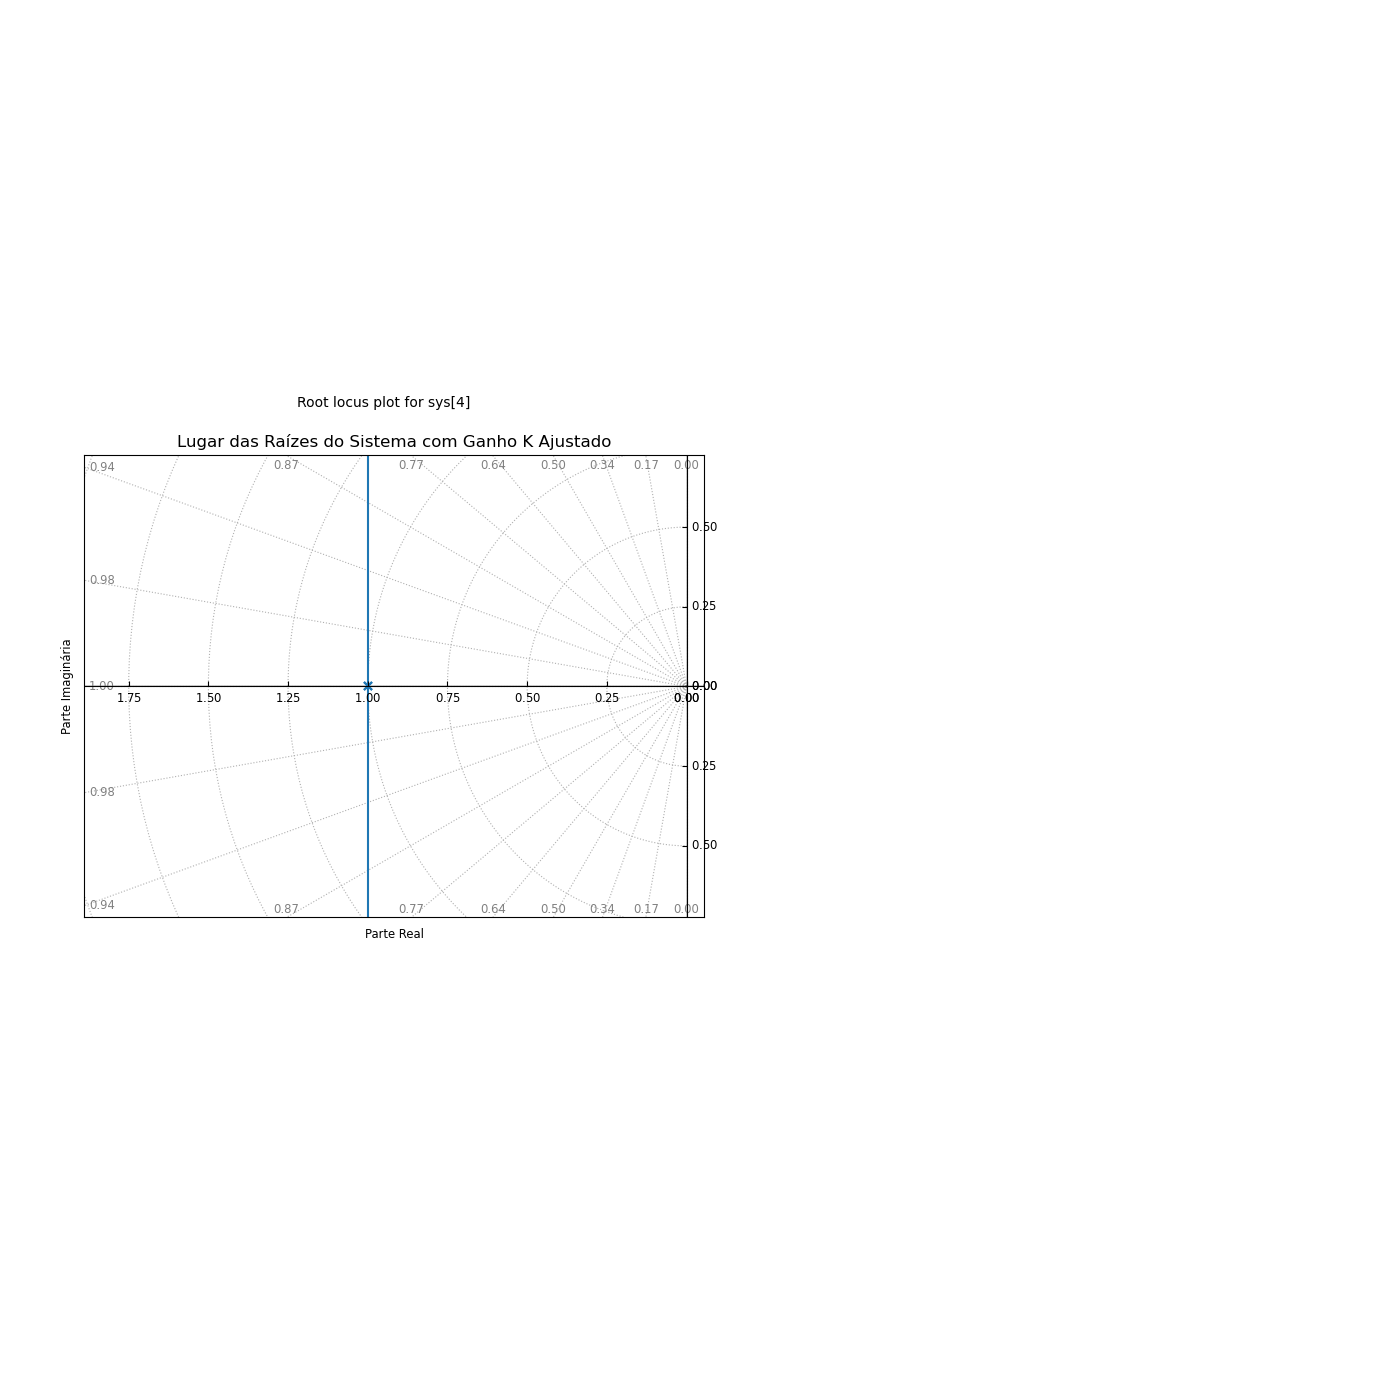

In [ ]:
num = [1]  # K
den = [1, 2, 1]  # s^2 + 2s + 1

# Criando a função de transferência
G_H = ctrl.TransferFunction(num, den)

# Plotando o Lugar das Raízes para diferentes valores de K
plt.figure(figsize=(8,6))

# Plotando o Lugar das Raízes com uma grade para facilitar a visualização
ctrl.rlocus(G_H, grid=True)

plt.title("Lugar das Raízes do Sistema com Ganho K Ajustado")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginária")
plt.show()

## 7.7 Controladores de Três Termos (PID)

O **controlador PID** é amplamente utilizado em sistemas de controle. Ele ajusta a saída do sistema com base em três componentes: proporcional, integral e derivativo. A função de transferência do PID é dada por:

$$
C(s) = K_p + \frac{K_i}{s} + K_d s
$$

Onde \(K_p\), \(K_i\), e \(K_d\) são os ganhos proporcional, integral e derivativo, respectivamente.

O **lugar das raízes** pode ser utilizado para ajustar esses parâmetros, garantindo que o sistema atenda aos requisitos de estabilidade e desempenho.


## 7.8 Exemplo de Projeto: Sistema de Controle de um Manipulador de Laser

Considere o sistema de controle de um manipulador de laser, que deve ser ajustado para realizar movimentos rápidos e precisos. O controlador pode ser projetado utilizando o método do lugar das raízes, ajustando o ganho \(K\) e os parâmetros do controlador PID para garantir que as raízes se posicionem adequadamente no plano \(s\), atendendo aos requisitos de desempenho, como tempo de subida, sobreleap e estabilidade.

### Passos:
1. **Modelo do Sistema**: Defina o modelo do manipulador de laser em termos de sua função de transferência.
2. **Análise do Lugar das Raízes**: Determine o lugar das raízes do sistema à medida que \(K\) é variado.
3. **Projeto do Controlador**: Ajuste os parâmetros do controlador PID para garantir que as raízes se posicionem nas regiões desejadas, atendendo às especificações de desempenho.

### **Simulação da Resposta a uma Rampa**

Neste exemplo, vamos simular a resposta do sistema a uma entrada em rampa, levando em consideração o ganho \( K = 10 \) para garantir que o erro estacionário seja pequeno. O sistema é representado pela função de transferência:

$$
G(s)H(s) = \frac{K}{s^3 + 15s^2 + 50s + 50K}
$$

Vamos simular a resposta a uma entrada em rampa e analisar a ultrapassagem e o tempo de assentamento do sistema.


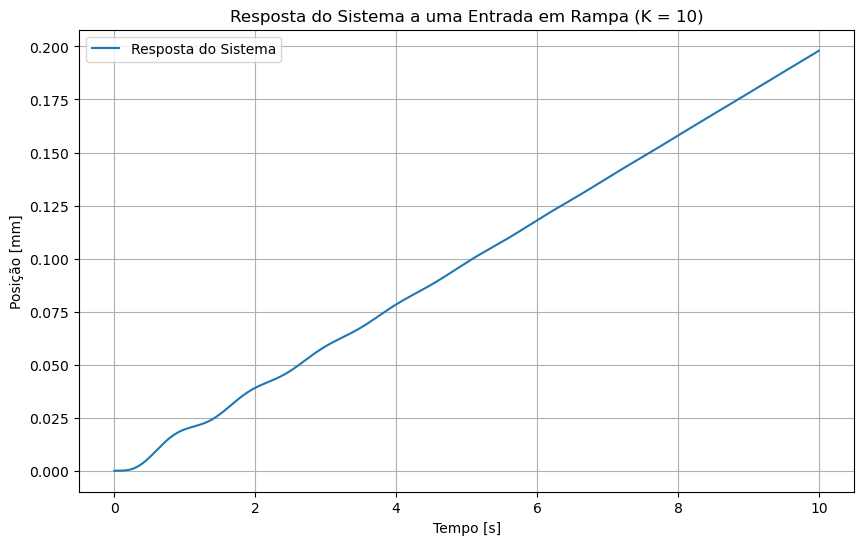

In [ ]:
# Definindo os parâmetros do sistema
K = 10  # Ganho
num = [K]  # Numerador da função de transferência
den = [1, 15, 50, 50*K]  # Denominador da função de transferência (com K = 10)

# Criando a função de transferência do sistema
system = ctrl.TransferFunction(num, den)

# Definindo a entrada em rampa: r(t) = A * t (com A = 1 mm/s)
A = 1  # Amplitude da entrada em rampa
time = np.linspace(0, 10, 500)  # Tempo de simulação
rampa = A * time  # Entrada em rampa: r(t) = A * t

# Resposta do sistema a uma entrada em rampa
time, response = ctrl.forced_response(system, time, rampa)

# Plotando a resposta
plt.figure(figsize=(10,6))
plt.plot(time, response, label='Resposta do Sistema')
plt.title('Resposta do Sistema a uma Entrada em Rampa (K = 10)')
plt.xlabel('Tempo [s]')
plt.ylabel('Posição [mm]')
plt.grid(True)
plt.legend()
plt.show()

---

## Conclusão

O método do **lugar das raízes** é uma técnica gráfica usada para analisar e projetar sistemas de controle realimentados. Ele permite visualizar como as raízes da equação característica do sistema se deslocam no plano \( s \) à medida que um parâmetro do sistema, geralmente o ganho \( K \), é variado.  
Esse método é útil porque permite ajustar o desempenho do sistema de forma intuitiva, garantindo estabilidade e resposta adequada. Além da construção manual do diagrama, o capítulo aborda o uso de computadores para gerar gráficos do lugar das raízes, destacando sua eficácia no projeto de controladores.  
Um exemplo importante discutido no capítulo é o **controlador PID**, que possui três parâmetros ajustáveis e pode ser projetado utilizando o lugar das raízes. Além disso, o conceito de **sensibilidade das raízes** a pequenas variações dos parâmetros é introduzido, permitindo uma análise mais precisa do comportamento do sistema.  
O método do lugar das raízes foi originalmente proposto por Evans em 1948 e, desde então, tem sido amplamente utilizado na engenharia de controle. Ele pode ser aplicado em sistemas com múltiplas malhas e pode ser combinado com o **critério de Routh-Hurwitz** para avaliar a estabilidade do sistema.  
Por fim, o capítulo destaca que, se a localização das raízes não for satisfatória, ajustes podem ser feitos diretamente a partir do diagrama do lugar das raízes, tornando o método uma ferramenta poderosa para o projeto de sistemas de controle.  